In [1]:
from gal4H0 import *
import pickle
from scipy.integrate import cumtrapz
import scipy

In [2]:
cosmo=FlatLambdaCDM(H0=70.,Om0=0.25)

In [3]:
def combine_H0(data_struct,ev_idx):
    pos_single=np.log(data_struct['single_pos'][ev_idx,:])
    combined=np.sum(pos_single,axis=0)
    combined-=combined.max()
    combined=np.exp(combined)
    combined/=np.trapz(combined,data_struct['H0_grid'])
    return combined


def pp_curve_2(CI,H0_posteriors,H0_grid,H0_truths,plotsigma=False,Nevents=None):
    Nrep=len(H0_posteriors['single_pos'])
    
    if Nevents is None:
        Nevents=H0_posteriors['single_pos'][0].shape[0]

    ci_fall=np.zeros(Nrep)    
    for i in range(Nrep):
        pos_single=np.log(H0_posteriors['single_pos'][i])
        combined=np.sum(pos_single[:Nevents:],axis=0)
        combined-=combined.max()
        combined=np.exp(combined)
        combined/=np.trapz(combined,H0_grid)
        cumulative=cumtrapz(combined,H0_grid)
        ci_fall[i]=cumulative[np.digitize(H0_truths[i],H0_grid)-1]
        
    
    if plotsigma:
        for ci, alpha in zip([0.68, 0.95, 0.997],[0.1,0.15,0.2]):
            edge_of_bound = (1. - ci) / 2.
            lower = scipy.stats.binom.ppf(1 - edge_of_bound, Nrep, CI) / Nrep
            upper = scipy.stats.binom.ppf(edge_of_bound, Nrep, CI) / Nrep
            lower[0] = 0
            upper[0] = 0
            plt.fill_between(CI, lower, upper, alpha=alpha, color='k')
            
    cc = plt.hist(ci_fall,bins=np.linspace(0,1,len(H0_truths)),density='True',cumulative=True,alpha=0.)
    
    ppplot, edges = cc[0], cc[1]
    
    return ppplot,(edges[1::]+edges[:-1:])*0.5

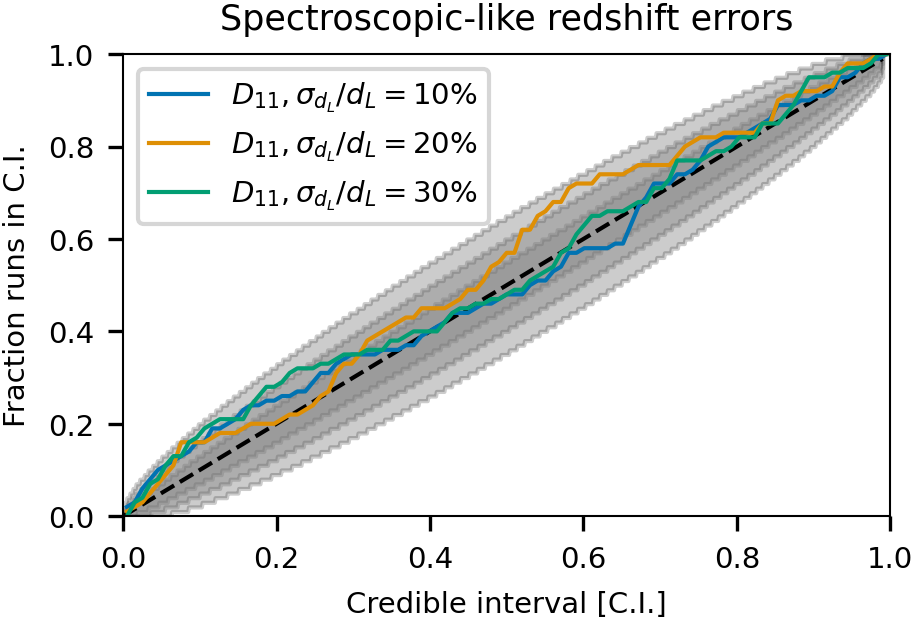

In [4]:
plt.figure(figsize=(3.3,2.0))

CI=np.linspace(0,0.99,1000)
plt.plot(CI,CI,ls='--',color='k')

plt.title('Spectroscopic-like redshift errors')


singlepos=pickle.load(open('ppplots_data/LOS_451_10perc_acc.p','rb'))
ppplot,ed=pp_curve_2(CI,singlepos,singlepos['H0_grid'],singlepos['true_H0'],plotsigma=True,Nevents=200)
plt.plot(ed,ppplot,color=pal[0],label=r'$D_{11}, \sigma_{d_L}/d_L=10\%$')
ppplot

singlepos=pickle.load(open('ppplots_data/LOS_451_20perc_acc.p','rb'))
ppplot,ed=pp_curve_2(CI,singlepos,singlepos['H0_grid'],singlepos['true_H0'],plotsigma=False,Nevents=200)
plt.plot(ed,ppplot,color=pal[1],label=r'$D_{11}, \sigma_{d_L}/d_L=20\%$')

singlepos=pickle.load(open('ppplots_data/LOS_451_30perc_acc.p','rb'))
ppplot,ed=pp_curve_2(CI,singlepos,singlepos['H0_grid'],singlepos['true_H0'],plotsigma=False,Nevents=200)
plt.plot(ed,ppplot,color=pal[2],label=r'$D_{11}, \sigma_{d_L}/d_L=30\%$')


plt.legend()
plt.xlabel(r'Credible interval [C.I.]')
plt.ylabel(r'Fraction runs in C.I.')
plt.xlim([0,1])
plt.ylim([0,1])

#plt.tight_layout()
plt.savefig('figures_paper/ppplot_spectra.pdf')

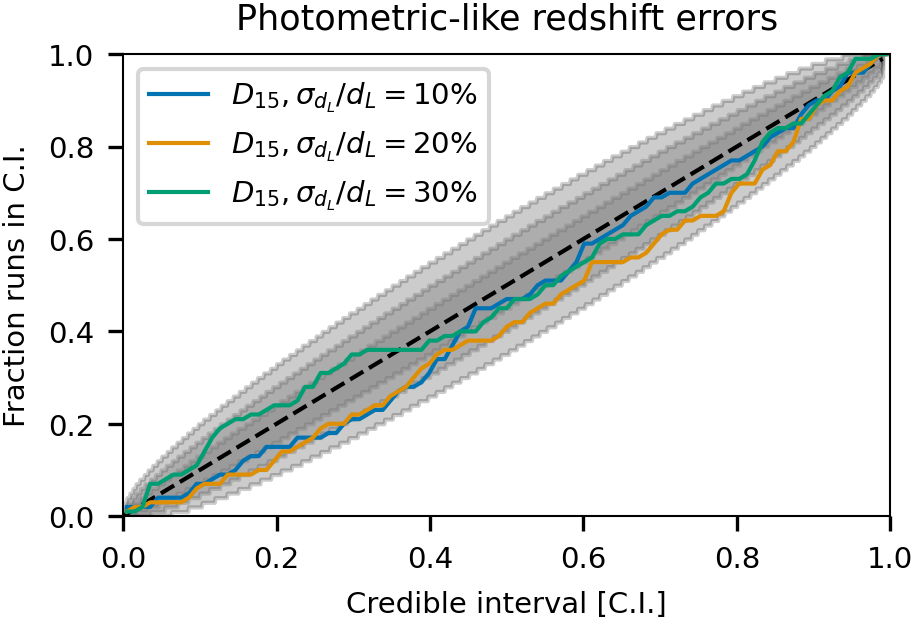

In [5]:
plt.figure(figsize=(3.3,2.0))

CI=np.linspace(0,0.99,1000)
plt.plot(CI,CI,ls='--',color='k')

plt.title('Photometric-like redshift errors')

singlepos=pickle.load(open('ppplots_data/LOS_455_10perc_acc.p','rb'))
ppplot,ed=pp_curve_2(CI,singlepos,singlepos['H0_grid'],singlepos['true_H0'],plotsigma=True,Nevents=200)
plt.plot(ed,ppplot,color=pal[0],label=r'$D_{15}, \sigma_{d_L}/d_L=10\%$')
ppplot

singlepos=pickle.load(open('ppplots_data/LOS_455_20perc_acc.p','rb'))
ppplot,ed=pp_curve_2(CI,singlepos,singlepos['H0_grid'],singlepos['true_H0'],plotsigma=False,Nevents=200)
plt.plot(ed,ppplot,color=pal[1],label=r'$D_{15}, \sigma_{d_L}/d_L=20\%$')

singlepos=pickle.load(open('ppplots_data/LOS_455_30perc_acc.p','rb'))
ppplot,ed=pp_curve_2(CI,singlepos,singlepos['H0_grid'],singlepos['true_H0'],plotsigma=False,Nevents=200)
plt.plot(ed,ppplot,color=pal[2],label=r'$D_{15}, \sigma_{d_L}/d_L=30\%$')



plt.legend()
plt.xlabel(r'Credible interval [C.I.]')
plt.ylabel(r'Fraction runs in C.I.')
plt.xlim([0,1])
plt.ylim([0,1])

#plt.tight_layout()
plt.savefig('figures_paper/ppplot_photo.pdf')


